I have to admit that I have been in the darkness for long years when it comes to statistics. Things like confidence intervals, p-values, hypothesis testing, central limit theorem, sample and population were a big blurry mess in my brain.

I lost my virginity on statistics with the [LEON]. This is dense stuff for electro-technical engineering so you need some vaseline first, I guess.

Lately I started reading some funny medium posts [HERE] and [HERE] and finally I decided to pick-up a MOOC and follow it to the bits I was interested in. I picked [THIS ONE] by Brian Caffo from the John Hopkins School of Biostatistics and I can only recommend it. 

Thank you Brian for showing me the light. 

The problem is that I know I will forget in some time, so I needed my own notes. I decided to write them as blog posts since you know *sharing is caring*. But I know that the heaviest user of this post will be my future me.

# But really, what the f is CLT?

This notebook will try to illustrate what is the almighty **Central Limit Theorem**, (CLT, for short, is a not a sandwhich) and why is it important in statistics.

But first let's try with some basic concepts.

# Population, sample and the Law of Large Numbers
Now imagine you have a random variable, let's be original and call it $X$. Our new friend is of random nature, this means that it can take any shape (value) within the nature given by its statistical properties. But we do not know those statistical properties, at least completely, our best shot is to estimate them - which is, kind of trying.

And that is a big difference. Imagine we observe $X$ a number of times $n$. Then we see the vector of observations $(x_1, ..., x_n)$ - this is what we call the **sample**. And from this sample we can estimate some statistical properties, like the sample mean, sample variance or approximate distribution.

But all these are just estimates of the real thing. The real thing is what we call the **population** and thus the true mean is the population mean and so on.
Here is where the **Law of Large Numbers** comes in handy, it basically says that we can only know perfectly the statistical properties of a random variable if we know *all* its values. Like *all of them*. Which basically means that we need *infinite* observations - which is impossible.

The funniest way to look at this is to think that if you put infinite monkeys and all of them write a random letter of the alphabet, and you repeat this experiment infinite times you will end up with the Quijote, somewhere.

# The sample mean, your new best friend
Imagine that we are observing our friend $X$ and we take a number of observations $(x_1,...,x_n)$. We can compute the sample mean of this observation: $\bar X$.

And here's the mindblowing twist. You can repeat this experiment a number of times and you will end up with different values of the sample mean, because the observations of $X$ are different. Which means that the sample mean is another random variable $\bar X$.

Let's make an experiment to illustrate this.

### Example: Geting a flavor for the elections
So you are running for president (after all Trump won, so why not?). You want to know how are you doing, so go ask a number of people if you need to bribe them or they would already vote for you.

Sample mean for this draw is 0.5


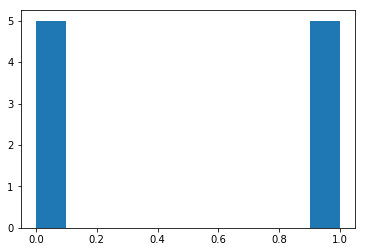

In [1]:
import numpy as np
import matplotlib.pyplot as plt

sample_size = 10  # you ask this many people
p = 0.55  # you don't know this, but the population probability is this one
sample_x = np.random.binomial(1, p, size=sample_size)
print("Sample mean for this draw is {}".format(np.mean(sample_x)))
plt.hist(sample_x)
plt.show()

If you run yourself the code you will get a sample mean that is a bit off the probability value we fed in. Recall that for a binomial its mean is the probability of success.

Now let's repeat this experiment a number of times, like a lot and let's draw the distribution/histogram of the sample means we are obtaining.

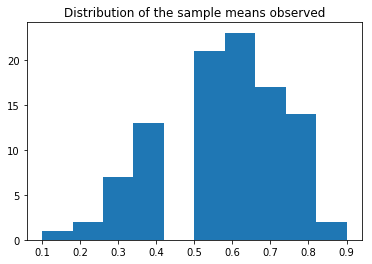

In [2]:
sample_vec = [np.mean(np.random.binomial(1, p, size=sample_size)) for i in range(100)]
plt.hist(sample_vec, bins=10)
plt.title("Distribution of the sample means observed")
plt.show()

By inspecting the data and wearing a Sherlock Holmes hat you kinda can guess that the odds look good for you. But that's 
not the point. The point is CLT.

# The Central Limit Theorem in the flesh
The moment has arrived, what on earth is the CLT? Well it basically says that if you have a number or random variables, of whatever nature (Poissons, Gaussian, Pikachu, Meeseks...) and you add them altogether you have a new random variable, this resulting random variable would become a Gaussian always. Provided that there's enough data (i.e. $n$ is large enough, so you have enough random variables to average in).

$$ Y = X_1 + X_2 + ... + X_n $$

Shoot, that looks like a lot like a sample meanm, that's it, *if you consider that it is all the same random variable, being multiple random variables with exactly the same statistical properties*.

$$ \bar X = {1\over n} \sum_i^n X_i $$

Being $X_i$ just the same random variable observed $n$ times.

### The elections example strikes back
Wait, we did that already just now. We just tried to plot the distribution of sample means we were getting and it didn't look very gaussian. 

Hold my beer. 

Remember I said *provided there's enough data*. Let's factor this in. Let's increase the sample size - this is, the number of variables we are averaging - and plot the distributions for the same number of draws.

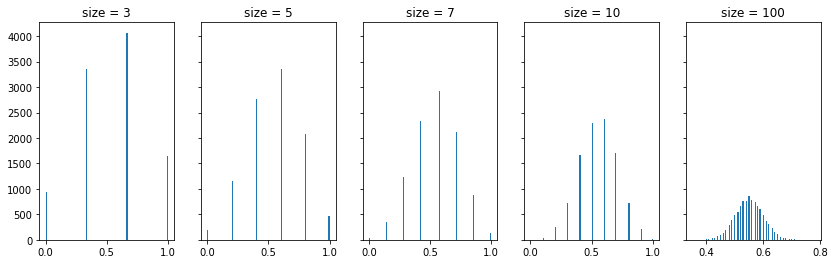

In [3]:
sample_sizes = [3, 5, 7, 10, 100]
fig, ax = plt.subplots(1, len(sample_sizes), sharey=True, figsize=(14,4))
for s in range(len(sample_sizes)):
    sample_vec = [np.mean(np.random.binomial(1, p, size=sample_sizes[s])) for i in range(10000)]
    ax[s].hist(sample_vec, bins=100)
    ax[s].set_title("size = {}".format(sample_sizes[s]))
plt.show()

Do you see the magic there?

We made the very same number of draws (high, around 10000) and calculated the sample mean on all of them. When the sample size was small we did not see any shape but as we go increasing the sample size it just becomes evident that it is gaussian.

### Example 2: Poisson distribution

Imagine that you are now observing arrival times. Say you are running a shop and you are counting how many clients are entering the shop at a given time interval. The door is very narrow and only one person can arrive at a time. Also this shop is very suspicious and people normally would show up alone (yeah, go figure what kinda shop is that).

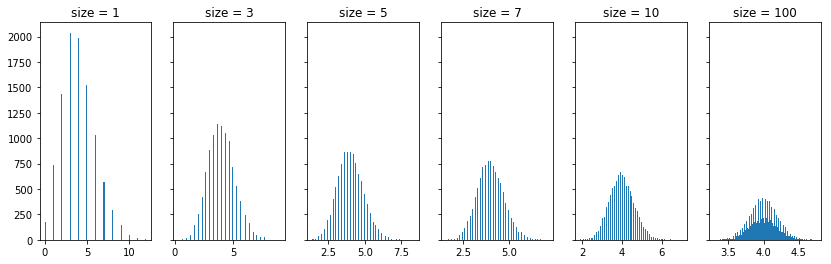

In [4]:
r = 2
T = 2
lam = r*T
sample_sizes = [1, 3, 5, 7, 10, 100]
fig, ax = plt.subplots(1, len(sample_sizes), sharey=True, figsize=(14,4))
for s in range(len(sample_sizes)):
    sample_vec = [np.mean(np.random.poisson(lam, size=sample_sizes[s])) for i in range(10000)]
    ax[s].hist(sample_vec, bins=100)
    ax[s].set_title("size = {}".format(sample_sizes[s]))
plt.show()

Your immediate reaction here would be something like: *wait, this is gaussian already.* 

Not quite.

When you have just one sample, you just take draws of the original distribution ($X$) hence the first plot is basically an approximation of a Poisson process with a mean of $\lambda$. You can see the shape quite well since we are doing loads of draws (10000). When you start doing averages of 3, 5 up to 100 you see that the shape has converged to a gaussian bell.

If you still are not convinced, don't be fooled about the shape, and just like at the values. The more data you have the narrower the bell is. That is another property that comes in quite handy. Let's plot the same experiment, but with overlap.

Remember, **increasing the sample size your sample mean becomes more gaussian and also narrower.**


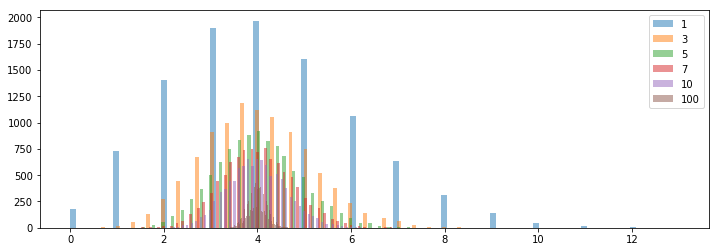

In [5]:
plt.figure(figsize=(12,4))
for s in range(len(sample_sizes)):
    sample_vec = [np.mean(np.random.poisson(lam, size=sample_sizes[s])) for i in range(10000)]
    plt.hist(sample_vec, bins=100, alpha=0.5)
plt.legend(sample_sizes)
plt.show()

# The Standard Error

Actually this bell shrinkage is well known and it is captured in a metric called **standard error**. 

The standard error is the error you make on your estimate. The more data you have the smaller this error - the variance or uncertainty of your estimate.

The standard error, which could be read as the standard deviation of the error you are making when estimating, is defined as:

$$ SE = \sqrt {{\sigma^2}\over n } $$

Where $\sigma^2$ is the variance of $X$ (the original random variable) and $n$ is the number of averages you have (sample size).

So if your sample size is very big you can be quite sure that given the CLT your sample mean is:

$$ \bar X \approx N(\mu, {\sigma^2 \over n}) $$

This is powerful stuff. This means that even with one draw of n samples you can approximate quite well the error you are making and that your sample mean estimate will be centered at the population mean (this is called a consistent estimator). 

Just one draw. 

### Why is the sample mean so important?
Well, it is quite useful indeed, but why? In my own case I use it for two things:

- Estimate a constant (i.e. scalar). You are observing noisy data of a certain value, that could be a voltage, a conversion rate on an e-commerce or just about anything that you assume it is one value.
- Estimate a property through the mean. If you know the nature of your problem you know that the mean tells you more (e.g. election is a binomial case, and hence the mean gives you the probability of winning).

# The missing link: boostrapping
If you are clever you would have observed that normally you will not have the luxury of observing a lot of draws of the same thing. Worry need not, you can create statistically equivalent (kinda) draws of the same random variable by bootstrapping. 

Bootstrapping means that from a vector of observations $(x_1,..., x_n)$ from the random variable $X$ you can create draws of $X$ by doing the following:

With this procedure you end up with vector of size $n$ and yes, indeed, you can have the same value copied a number of times (the only possibility of not having any value repeated is the original draw).

Those draws can be quite useful then to appoximate statistical properties of $X$.